In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score

nano1 = pd.read_excel(r'dane_nano1.xlsx')
nano2 = pd.read_excel(r'dane_nano2.xlsx')
size_deskryptor = nano1['Size']
ssa_deskryptor = nano1['SSA']

deskryptory = nano1[['Size','SSA']]
zmienna_zalezna_drzewo = nano1['Protein carbonylation (A-1/I-0)']

X_train, X_test,y_train,y_test = train_test_split(deskryptory[:10],zmienna_zalezna_drzewo[:10],test_size=0.3, random_state=0)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Text(334.8, 339.75, 'S <= 12.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Inactive'),
 Text(167.4, 203.84999999999997, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Inactive'),
 Text(502.20000000000005, 203.84999999999997, 'S <= 32.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Active'),
 Text(334.8, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Active'),
 Text(669.6, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Active')]

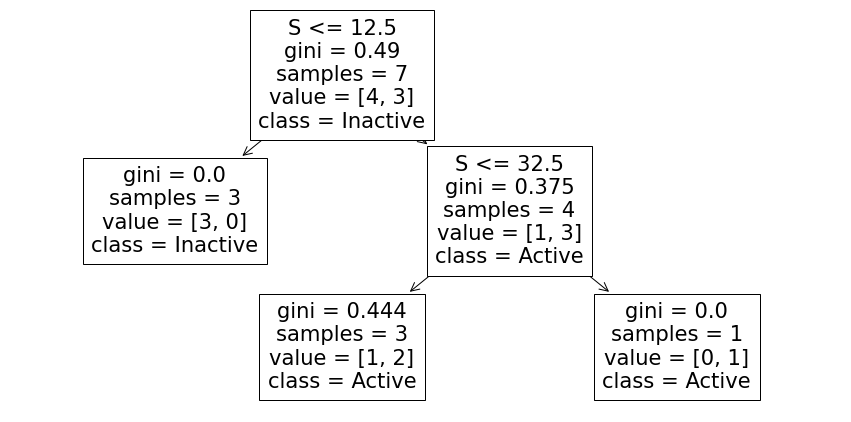

In [41]:
plt.figure(figsize = (15,7.5))
tree.plot_tree(clf,feature_names = nano1.columns[2],class_names=['Inactive',"Active"])

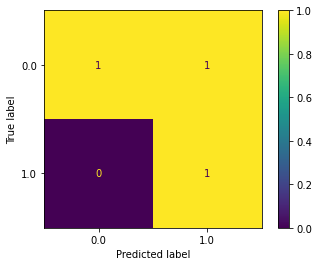

In [42]:
metrics.accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(clf, X_test, y_test)

In [43]:
print(classification_report(y_test,y_pred))

y_pred_done = clf.predict(deskryptory[10:])
y_pred_done

nano1.iloc[10:,-2] = y_pred_done
nano1.iloc[10:,-2]

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



10    1.0
11    1.0
12    0.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
Name: Protein carbonylation (A-1/I-0), dtype: float64

[Text(418.5, 356.7375, 'LUMO_C <= -0.75\nmse = 536.174\nsamples = 11\nvalue = 21.341'),
 Text(167.4, 254.8125, 'SSA <= -0.679\nmse = 0.085\nsamples = 5\nvalue = 0.45'),
 Text(83.7, 152.8875, 'mse = 0.0\nsamples = 3\nvalue = 0.25'),
 Text(251.10000000000002, 152.8875, 'SSA <= -0.257\nmse = 0.062\nsamples = 2\nvalue = 0.75'),
 Text(167.4, 50.96249999999998, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(334.8, 50.96249999999998, 'mse = 0.0\nsamples = 1\nvalue = 0.5'),
 Text(669.6, 254.8125, 'SHELPRES <= -0.053\nmse = 316.146\nsamples = 6\nvalue = 38.75'),
 Text(585.9, 152.8875, 'LUMO_C <= 0.047\nmse = 189.062\nsamples = 2\nvalue = 16.25'),
 Text(502.20000000000005, 50.96249999999998, 'mse = 0.0\nsamples = 1\nvalue = 30.0'),
 Text(669.6, 50.96249999999998, 'mse = 0.0\nsamples = 1\nvalue = 2.5'),
 Text(753.3000000000001, 152.8875, 'mse = 0.0\nsamples = 4\nvalue = 50.0')]

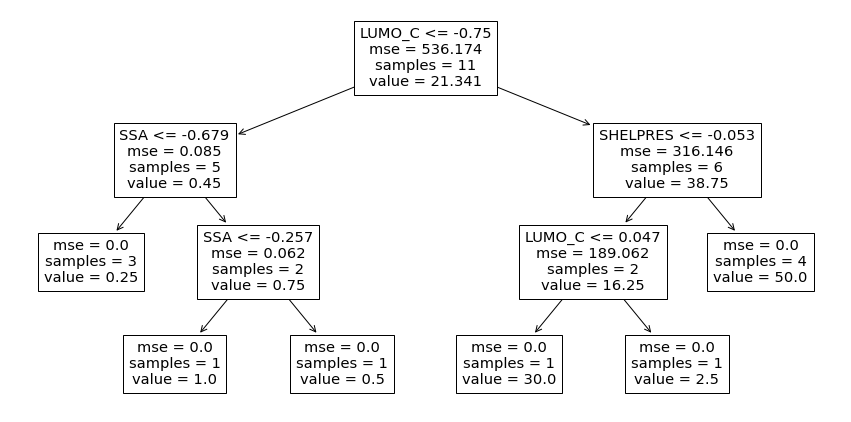

In [44]:
scaler = StandardScaler() 
nano2[['Size','SSA','SHELPRES','LUMO_C']] = scaler.fit_transform(nano2[['Size','SSA','SHELPRES','LUMO_C']])

size_deskryptor = nano2['Size']
ssa_deskryptor = nano2['SSA']
shelpres_deskryptor = nano2['SHELPRES']
lumo_deskryptor = nano2['LUMO_C']

deskryptory = nano2[['Size','SSA','SHELPRES','LUMO_C']]
zmienna_zalezna_drzewo = nano2['Measured NOEAC [mg/m3]']

X_train, X_test,y_train,y_test = train_test_split(deskryptory[:17],zmienna_zalezna_drzewo[:17],test_size=0.3, random_state=0)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize = (15,7.5)) 
tree.plot_tree(clf,feature_names = ['Size','SSA','SHELPRES', 'LUMO_C'])

In [45]:
y_pred_done = clf.predict(deskryptory[17:])
y_pred_done
print(f'Q2ex wynosi: {metrics.r2_score(y_test, y_pred)}'),
print(f'RMSEex wynosi {np.sqrt(metrics.mean_squared_log_error(y_test,y_pred))}')

Q2ex wynosi: 0.8048171832178428
RMSEex wynosi 0.6304514897099193


0.75


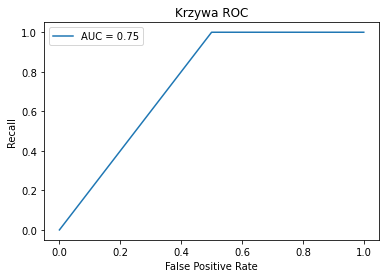

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='AUC = ' + str(auc))
plt.title('Krzywa ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()